In [2]:
import numpy as np
np.random.seed(314159)

import matplotlib.pyplot as plt

In [8]:
s4_tm = np.load('results/synth-4_qSVM_top_models.npy')
s4_auc = np.load('results/synth-4_qSVM_top_auroc.npy')
s4_acc = np.load('results/synth-4_qSVM_top_accuracy.npy')

In [9]:
s3_tm = np.load('results/synth-3_qSVM_top_models.npy')
s3_auc = np.load('results/synth-3_qSVM_top_auroc.npy')
s3_acc = np.load('results/synth-3_qSVM_top_accuracy.npy')

In [10]:
s2_tm = np.load('results/synth-2_qSVM_top_models.npy')
s2_auc = np.load('results/synth-2_qSVM_top_auroc.npy')
s2_acc = np.load('results/synth-2_qSVM_top_accuracy.npy')

In [13]:
print("models")
print("synth-2, ", s2_tm[0])
print("synth-3, ", s3_tm[0])
print("synth-4, ", s4_tm[0])

models
synth-2,  [2 3 1 4]
synth-3,  [2 4 5 1]
synth-4,  [2 2 1 4]


In [22]:
s2_qsvm_auc = s2_auc[:, 0]
s2_qsvm_acc = s2_acc[:, 0]

s3_qsvm_auc = s3_auc[:, 0]
s3_qsvm_acc = s3_acc[:, 0]

s4_qsvm_auc = s4_auc[:, 0]
s4_qsvm_acc = s4_acc[:, 0]

aucs = np.vstack((s2_qsvm_auc, s3_qsvm_auc, s4_qsvm_auc)).T
accs = np.vstack((s2_qsvm_acc, s3_qsvm_acc, s4_qsvm_acc)).T

In [31]:
boxprops = dict(linewidth=0.4, color='black')
flierprops = dict(marker='.', markerfacecolor='lightblue', markersize=8, markeredgewidth = 0.4,
                  markeredgecolor='black')
whiskerprops = dict(linewidth=1)

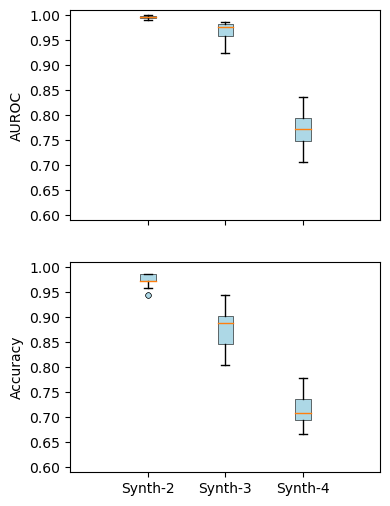

In [46]:
fig, ax = plt.subplots(2, 1,figsize = (4, 6))

#Plotting boxplot
bplt = ax[0].boxplot(aucs, positions = [0.5, 1, 1.5], widths = [0.1] * 3, boxprops=boxprops, flierprops=flierprops, whiskerprops=whiskerprops, patch_artist=True)

#Prettifying boxplot
for patch in bplt['boxes']:
    patch.set_facecolor('lightblue')

#Setting axis tick labels
ax[0].set_xticks([0.5, 1, 1.5], [])
ax[0].set_ylabel('AUROC')

ax[0].set_ylim(0.59, 1.01)
ax[0].set_yticks(np.arange(0.6, 1.05, 0.05), ['{:.2f}'.format(t) for t in np.arange(0.6, 1.05, 0.05)])

########
#AXIS 1#
########

#Plotting boxplot
bplt = ax[1].boxplot(accs, positions = [0.5, 1, 1.5], widths = [0.1] * 3, boxprops=boxprops, flierprops=flierprops, whiskerprops=whiskerprops, patch_artist=True)

#Prettifying boxplot
for patch in bplt['boxes']:
    patch.set_facecolor('lightblue')

#Setting axis tick labels
ax[1].set_xticks([0.5, 1, 1.5], ['Synth-2', 'Synth-3', 'Synth-4'])
ax[1].set_ylabel('Accuracy')

ax[1].set_ylim(0.59, 1.01)
ax[1].set_yticks(np.arange(0.6, 1.05, 0.05), ['{:.2f}'.format(t) for t in np.arange(0.6, 1.05, 0.05)])

plt.show()